In [1]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


1. Lectura de datos

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

archivo = 'antidepressant-use-by-country-2024.csv'

def cargar_datos(archivo):
    
    df = pd.read_csv(archivo)
    
    return df

cargar_datos(archivo)


,country,AntidepressantUse_PeoplePer1kUsingDaily_2022,AntidepressantUse_PeoplePer1kUsingDaily_2021,AntidepressantUseAnnualSales2021,AntidepressantUseAnnualSalesPerCapita2021,AntidepressantUseAnnualSales2020,AntidepressantUseAnnualSalesPerCapita2020,AntidepressantUse_PeoplePer1kUsingDaily_2019,AntidepressantUse_PeoplePer1kUsingDaily_2018,AntidepressantUse_PeoplePer1kUsingDaily_2017,AntidepressantUse_PeoplePer1kUsingDaily_2020
0,Turkey,NaN,52.5,NaN,NaN,139.1,1.604637,44.2,44.1,43.5,48.9
1,Germany,NaN,64.0,NaN,NaN,812.1,9.702847,60.3,58.5,56.9,62.2
2,United Kingdom,NaN,138.2,NaN,NaN,NaN,NaN,123.9,116.5,107.9,131.7
3,France,NaN,57.6,NaN,NaN,NaN,NaN,54.4,51.5,51.3,54.5
4,Italy,45.5,44.6,478.4,8.009463,456.1,7.636112,42.8,41.6,40.4,43.7
5,South Korea,NaN,NaN,NaN,NaN,231.2,4.459154,NaN,NaN,NaN,NaN
6,Spain,98.4,92.7,717.0,15.020216,649.0,13.595705,83.6,80.4,77.2,86.9
7,Canada,134.0,130.1,1187.0,30.868004,1032.7,26.855424,114.1,108.4,104.4,122.0
8,Australia,NaN,127.9,NaN,NaN,348.2,13.414794,115.6,112.2,109.3,122.2
9,Chile,94.3,90.7,121.8,6.260172,100.7,5.175692,52.0,40.1,42.0,67.0


2.Limpieza de datos

In [2]:
def limpiar_datos(df):
    
    df = df.drop_duplicates(subset=['country'])
    
    df.replace('',pd.NA, inplace=True)
    
    columnas_numericas = df.columns.drop('country')
    for col in columnas_numericas:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Manejar valores faltantes, por ejemplo, rellenando con la mediana
    df.fillna('Sin datos', inplace=True)
    
    return df
limpiar_datos(cargar_datos(archivo))

C:\Users\Casa\AppData\Local\Temp\ipykernel_14372\3387119802.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sin datos' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Sin datos', inplace=True)


,country,AntidepressantUse_PeoplePer1kUsingDaily_2022,AntidepressantUse_PeoplePer1kUsingDaily_2021,AntidepressantUseAnnualSales2021,AntidepressantUseAnnualSalesPerCapita2021,AntidepressantUseAnnualSales2020,AntidepressantUseAnnualSalesPerCapita2020,AntidepressantUse_PeoplePer1kUsingDaily_2019,AntidepressantUse_PeoplePer1kUsingDaily_2018,AntidepressantUse_PeoplePer1kUsingDaily_2017,AntidepressantUse_PeoplePer1kUsingDaily_2020
0,Turkey,Sin datos,52.5,Sin datos,Sin datos,139.1,1.604637,44.2,44.1,43.5,48.9
1,Germany,Sin datos,64.0,Sin datos,Sin datos,812.1,9.702847,60.3,58.5,56.9,62.2
2,United Kingdom,Sin datos,138.2,Sin datos,Sin datos,Sin datos,Sin datos,123.9,116.5,107.9,131.7
3,France,Sin datos,57.6,Sin datos,Sin datos,Sin datos,Sin datos,54.4,51.5,51.3,54.5
4,Italy,45.5,44.6,478.4,8.009463,456.1,7.636112,42.8,41.6,40.4,43.7
5,South Korea,Sin datos,Sin datos,Sin datos,Sin datos,231.2,4.459154,Sin datos,Sin datos,Sin datos,Sin datos
6,Spain,98.4,92.7,717.0,15.020216,649.0,13.595705,83.6,80.4,77.2,86.9
7,Canada,134.0,130.1,1187.0,30.868004,1032.7,26.855424,114.1,108.4,104.4,122.0
8,Australia,Sin datos,127.9,Sin datos,Sin datos,348.2,13.414794,115.6,112.2,109.3,122.2
9,Chile,94.3,90.7,121.8,6.260172,100.7,5.175692,52.0,40.1,42.0,67.0


3. Obtener top 10 año 2021

In [16]:
def obtener_top10_21(df, columna='AntidepressantUse_PeoplePer1kUsingDaily_2021'):
    """
    Obtiene los 10 países con mayor consumo de antidepresivos según una columna específica.
    
    Args:
        df (pd.DataFrame): DataFrame limpio.
        columna (str): Columna a usar para ordenar.
        
    Returns:
        pd.DataFrame: Top 10 países.
    """
    if columna not in df.columns:
        raise ValueError(f"La columna {columna} no existe en el DataFrame.")
    
    # Convertir la columna a numérico, con NaN para valores no convertibles
    df[columna] = pd.to_numeric(df[columna], errors='coerce')
    
    # Ordenar el DataFrame de mayor a menor según la columna especificada
    df_top10_21 = df.sort_values(by=columna, ascending=False, na_position='last').head(10)
    
    # Resetear el índice y crear uno nuevo comenzando desde 1
    df_top10_21= df_top10_21.reset_index(drop=True)
    df_top10_21.index = df_top10_21.index + 1
    
    columnas_2021 = [col for col in df.columns if '2021' in col]
    df_top10_21 = df_top10_21[['country'] + columnas_2021]
    return df_top10_21
df_top_21 = obtener_top10_21(limpiar_datos(cargar_datos(archivo)))

C:\Users\Casa\AppData\Local\Temp\ipykernel_14372\3387119802.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sin datos' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Sin datos', inplace=True)


4. Obtener top 10 año 2022

In [4]:
def obtener_top10_22(df, columna='AntidepressantUse_PeoplePer1kUsingDaily_2022'):
    """
    Obtiene los 10 países con mayor consumo de antidepresivos según una columna específica.
    
    Args:
        df (pd.DataFrame): DataFrame limpio.
        columna (str): Columna a usar para ordenar.
        
    Returns:
        pd.DataFrame: Top 10 países.
    """
    # Verificar si la columna existe
    if columna not in df.columns:
        raise ValueError(f"La columna {columna} no existe en el DataFrame.")
    
    # Convertir la columna a numérico, con NaN para valores no convertibles
    df[columna] = pd.to_numeric(df[columna], errors='coerce')
    
    # Ordenar el DataFrame de mayor a menor según la columna especificada
    df_top10_22 = df.sort_values(by=columna, ascending=False, na_position='last').head(10)
    
    # Resetear el índice y crear uno nuevo comenzando desde 1
    df_top10_22 = df_top10_22.reset_index(drop=True)
    df_top10_22.index = df_top10_22.index + 1
    
    columnas_2022 = [col for col in df.columns if '2022' in col]
    df_top10_22 = df_top10_22[['country'] + columnas_2022]
    
    return df_top10_22

top_10_22= obtener_top10_22(limpiar_datos(cargar_datos(archivo)))


C:\Users\Casa\AppData\Local\Temp\ipykernel_14372\3387119802.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sin datos' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Sin datos', inplace=True)


5. Obtener top10 por renta 

In [22]:
def obtener_top10_por_renta(df, columna_consumo='AntidepressantUse_PeoplePer1kUsingDaily_2022', columna_renta='AntidepressantUseAnnualSalesPerCapita2021'):
    """
    Obtiene los 10 países con mayor consumo de antidepresivos según su renta.
    
    Args:
        df (pd.DataFrame): DataFrame limpio.
        columna_consumo (str): Columna de consumo de antidepresivos.
        columna_renta (str): Columna de renta (ventas per cápita).
        
    Returns:
        pd.DataFrame: Top 10 países.
    """
    
    if columna_consumo not in df.columns:
        raise ValueError(f"La columna {columna_consumo} no existe en el DataFrame.")
    
    # Convertir la columna a numérico, con NaN para valores no convertibles
    df[columna_consumo] = pd.to_numeric(df[columna_consumo], errors='coerce')
    df[columna_renta] = pd.to_numeric(df[columna_renta], errors='coerce')
    # Primero, ordenar por renta descendente
    df_sorted_renta = df.sort_values(by=columna_renta, ascending=False)
    
    # Luego, dentro de los países con mayor renta, ordenar por consumo
    df_sorted = df_sorted_renta.sort_values(by=columna_consumo, ascending=False)
    
    # Seleccionar los 10 primeros
    df_top10 = df_sorted.head(10)
    df_top10 = df_top10.reset_index(drop=True)
    df_top10.index = df_top10.index + 1
    
    return df_top10
df_top10 = obtener_top10_por_renta(limpiar_datos(cargar_datos(archivo)))

C:\Users\Casa\AppData\Local\Temp\ipykernel_14372\3387119802.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sin datos' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Sin datos', inplace=True)


6. Gráfico top10 consumo en el año 2022

C:\Users\Casa\AppData\Local\Temp\ipykernel_14372\1512795776.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna, y='country', data=top_10_22, palette='viridis')


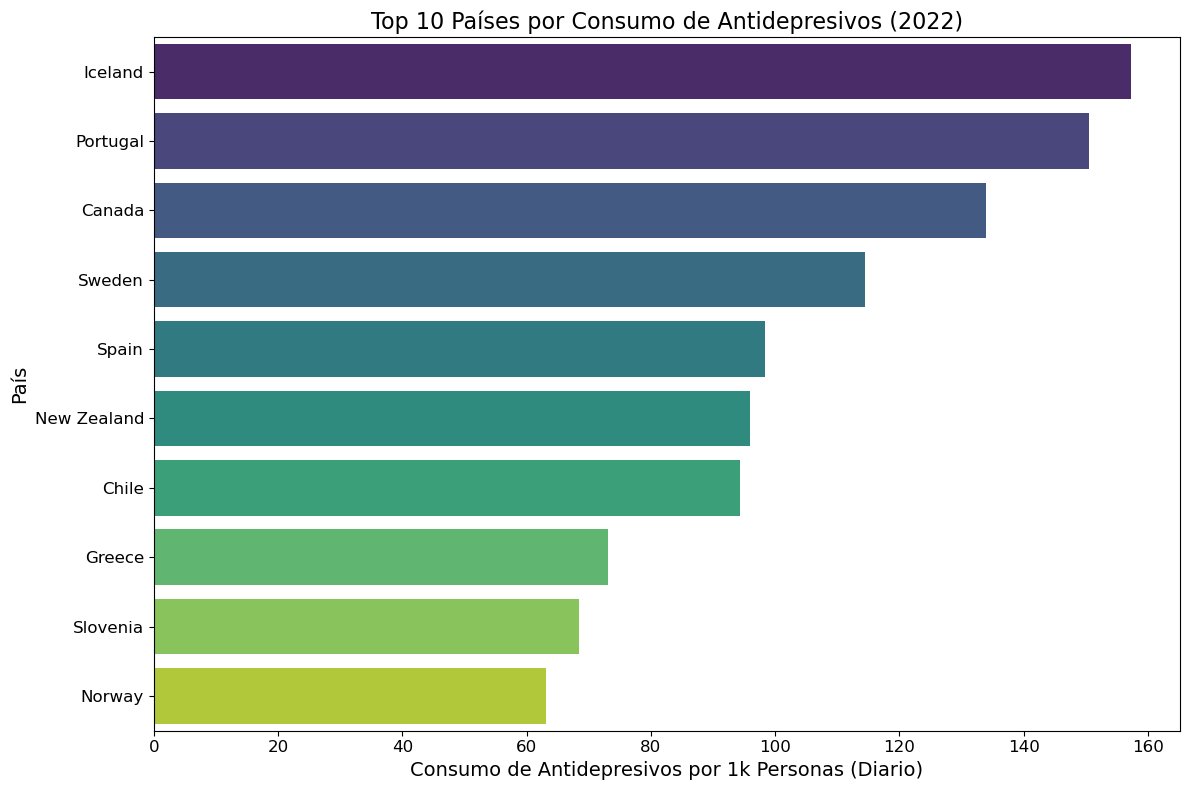

In [27]:

def graficar_top10_22(top_10_22, columna='AntidepressantUse_PeoplePer1kUsingDaily_2022', titulo='Top 10 Países por Consumo de Antidepresivos (2022)'):
    """
    Grafica los 10 países con mayor consumo de antidepresivos.
    
    Args:
        df_top10_22 (pd.DataFrame): DataFrame con los 10 países.
        columna (str): Columna a usar para la gráfica.
        titulo (str): Título de la gráfica.
    """
    plt.figure(figsize=(12, 8))
    sns.barplot(x=columna, y='country', data=top_10_22, palette='viridis')
    plt.title(titulo, fontsize=16)
    plt.xlabel('Consumo de Antidepresivos por 1k Personas (Diario)', fontsize=14)
    plt.ylabel('País', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
graficar_top10_22(top_10_22,columna='AntidepressantUse_PeoplePer1kUsingDaily_2022', titulo='Top 10 Países por Consumo de Antidepresivos (2022)')

C:\Users\Casa\AppData\Local\Temp\ipykernel_14372\3956865167.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna, y='country', data=df_top_21, palette='viridis')


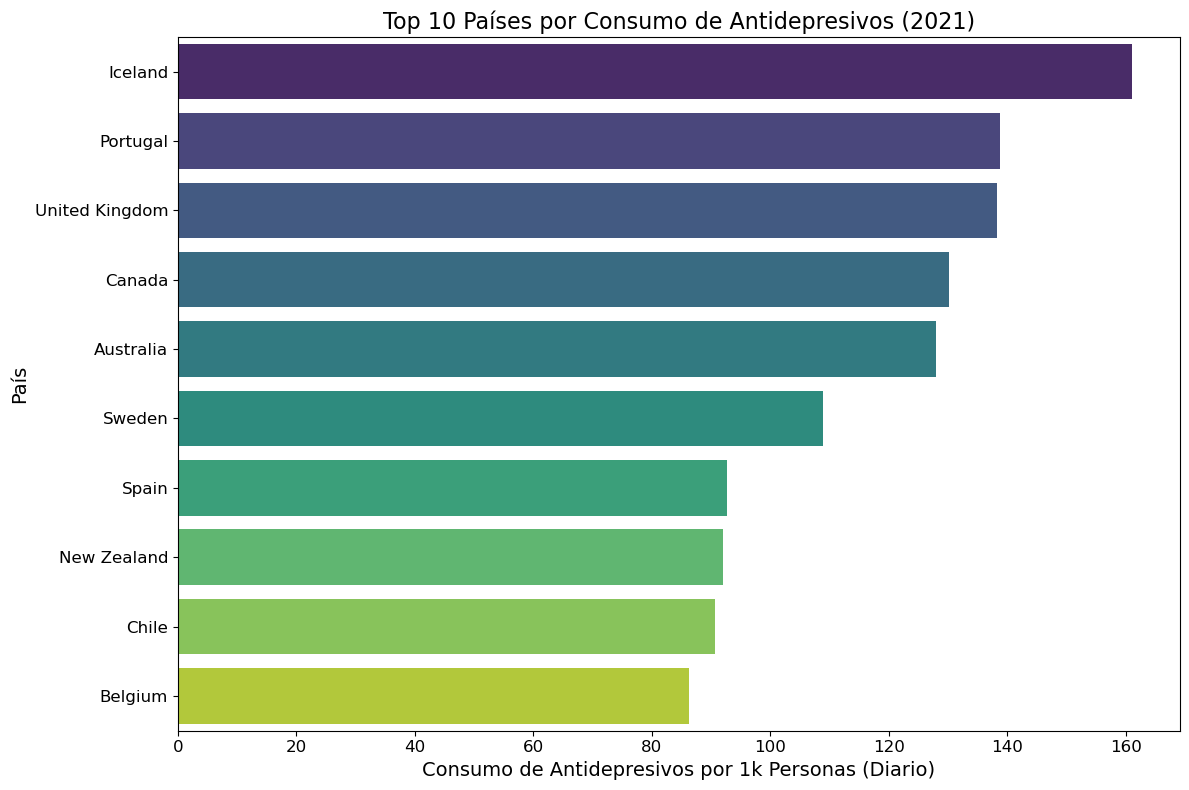

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
def graficar_top10_21(df_top_21, columna='AntidepressantUse_PeoplePer1kUsingDaily_2021', titulo='Top 10 Países por Consumo de Antidepresivos (2021)'):
    """
    Grafica los 10 países con mayor consumo de antidepresivos.
    
    Args:
        df_top10_22 (pd.DataFrame): DataFrame con los 10 países.
        columna (str): Columna a usar para la gráfica.
        titulo (str): Título de la gráfica.
    """
    plt.figure(figsize=(12, 8))
    sns.barplot(x=columna, y='country', data=df_top_21, palette='viridis')
    plt.title(titulo, fontsize=16)
    plt.xlabel('Consumo de Antidepresivos por 1k Personas (Diario)', fontsize=14)
    plt.ylabel('País', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
graficar_top10_21(df_top_21,columna='AntidepressantUse_PeoplePer1kUsingDaily_2021', titulo='Top 10 Países por Consumo de Antidepresivos (2021)')

Grafico top 10 por renta

C:\Users\Casa\AppData\Local\Temp\ipykernel_14372\2947901936.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna_consumo, y='country', data=df_top10, palette='Blues_d', label='Consumo (1k personas/día)')
C:\Users\Casa\AppData\Local\Temp\ipykernel_14372\2947901936.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna_renta, y='country', data=df_top10, palette='Greens_d', label='Renta per cápita (2021)', ax=ax2)


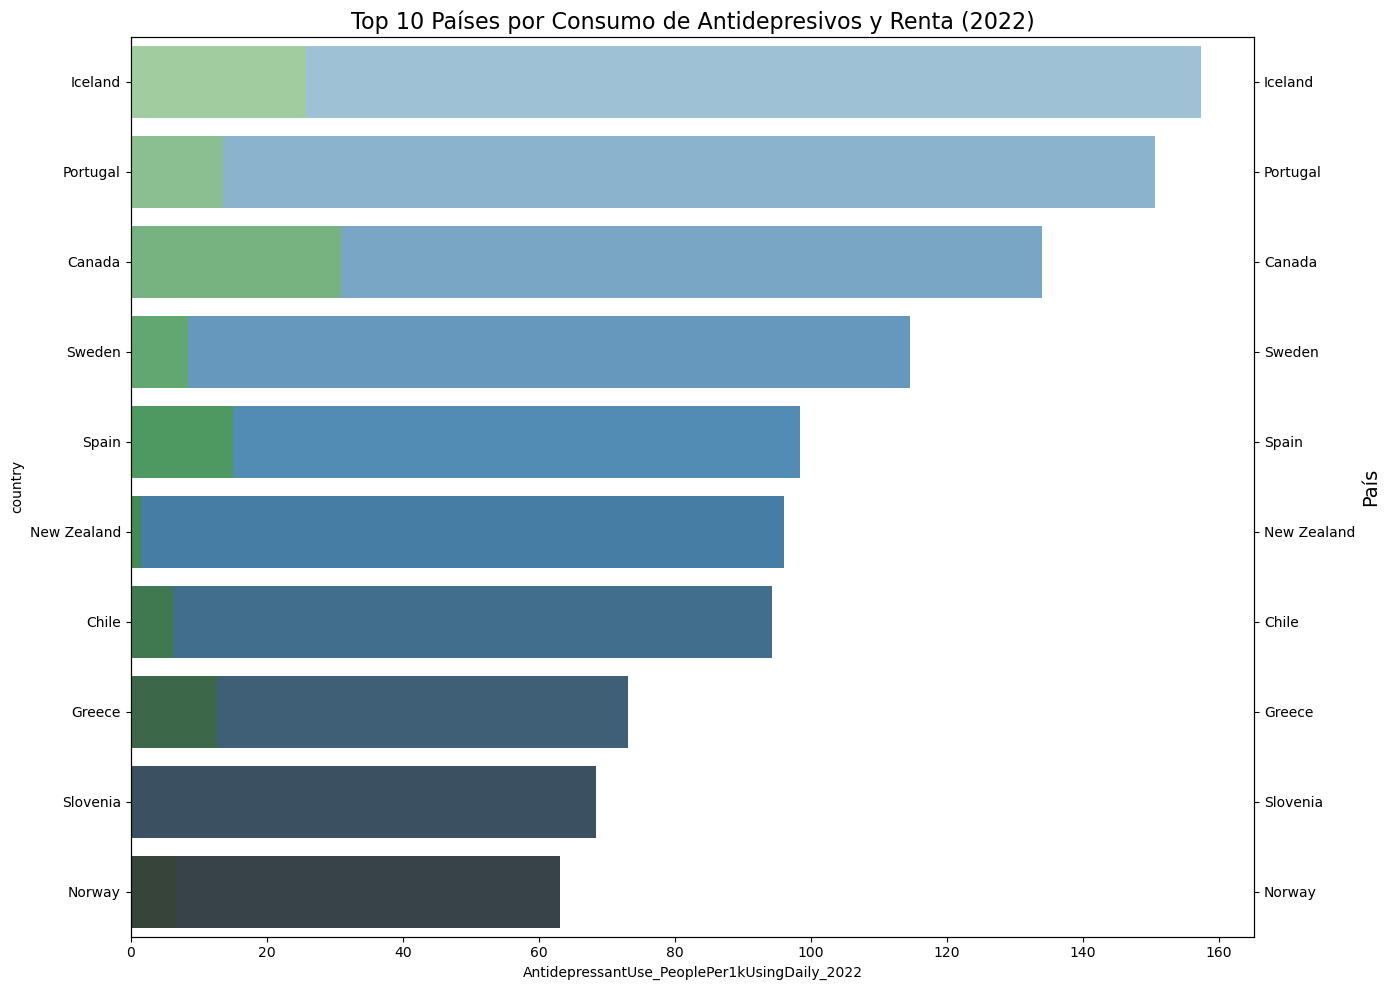

In [31]:
def graficar_top10_por_renta(df_top10, columna_consumo='AntidepressantUse_PeoplePer1kUsingDaily_2022', columna_renta='AntidepressantUseAnnualSalesPerCapita2021', titulo='Top 10 paises consumo de antidepresivos por Renta'):
    """
     Grafica los 10 países con mayor consumo de antidepresivos según su renta.
    
    Args:
        df_top10 (pd.DataFrame): DataFrame con los 10 países.
        columna_consumo (str): Columna de consumo de antidepresivos.
        columna_renta (str): Columna de renta.
        titulo (str): Título de la gráfica.
    """
    plt.figure(figsize=(14, 10))
     # Crear gráfico de barras para el consumo
    sns.barplot(x=columna_consumo, y='country', data=df_top10, palette='Blues_d', label='Consumo (1k personas/día)')
    
    # Crear otro eje para graficar la renta
    ax2 = plt.twinx()
    sns.barplot(x=columna_renta, y='country', data=df_top10, palette='Greens_d', label='Renta per cápita (2021)', ax=ax2)
    
    # Título y etiquetas
    plt.title('Top 10 Países por Consumo de Antidepresivos y Renta (2022)', fontsize=16)
    plt.xlabel('Consumo de Antidepresivos por 1k Personas (Diario) y Renta per Cápita', fontsize=14)
    plt.ylabel('País', fontsize=14)
    
    # Ajustar el layout
    plt.tight_layout()
    
    # Mostrar gráfico
    plt.show()


    
graficar_top10_por_renta(df_top10, columna_consumo='AntidepressantUse_PeoplePer1kUsingDaily_2022', columna_renta='AntidepressantUseAnnualSalesPerCapita2021', titulo='Top 10 paises consumo de antidepresivos por Renta')


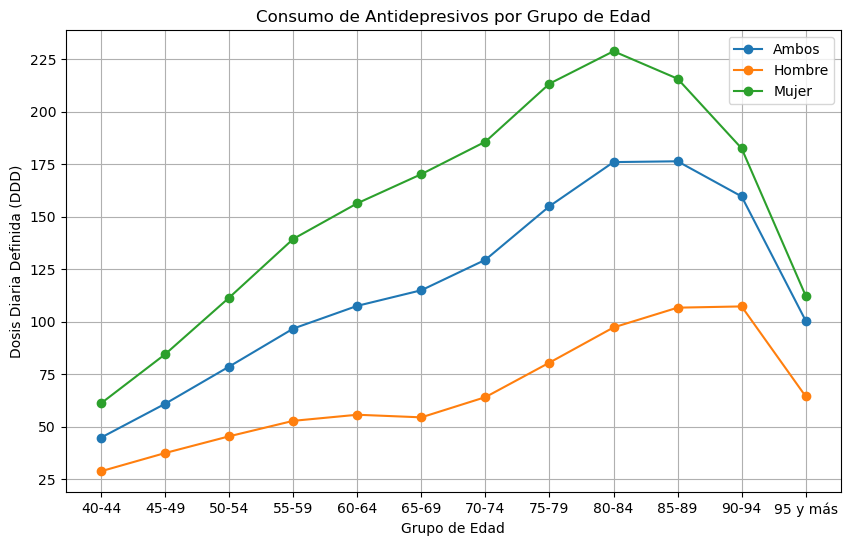

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    'Grupo edad': ['40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95 y más'],
    'Ambos': [44.83, 60.93, 78.66, 96.74, 107.57, 115, 129.51, 155.02, 176.03, 176.42, 159.68, 100.5],
    'Hombre': [28.8, 37.47, 45.44, 52.8, 55.7, 54.46, 64.09, 80.53, 97.28, 106.7, 107.29, 64.45],
    'Mujer': [61.17, 84.53, 111.51, 139.45, 156.42, 170.3, 185.76, 213.38, 228.84, 215.75, 182.57, 112.39]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Graficar consumo de antidepresivos por grupo de edad
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:
    plt.plot(df['Grupo edad'], df[column], marker='o', label=column)

plt.title('Consumo de Antidepresivos por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Dosis Diaria Definida (DDD)')
plt.legend()
plt.grid(True)


plt.show()


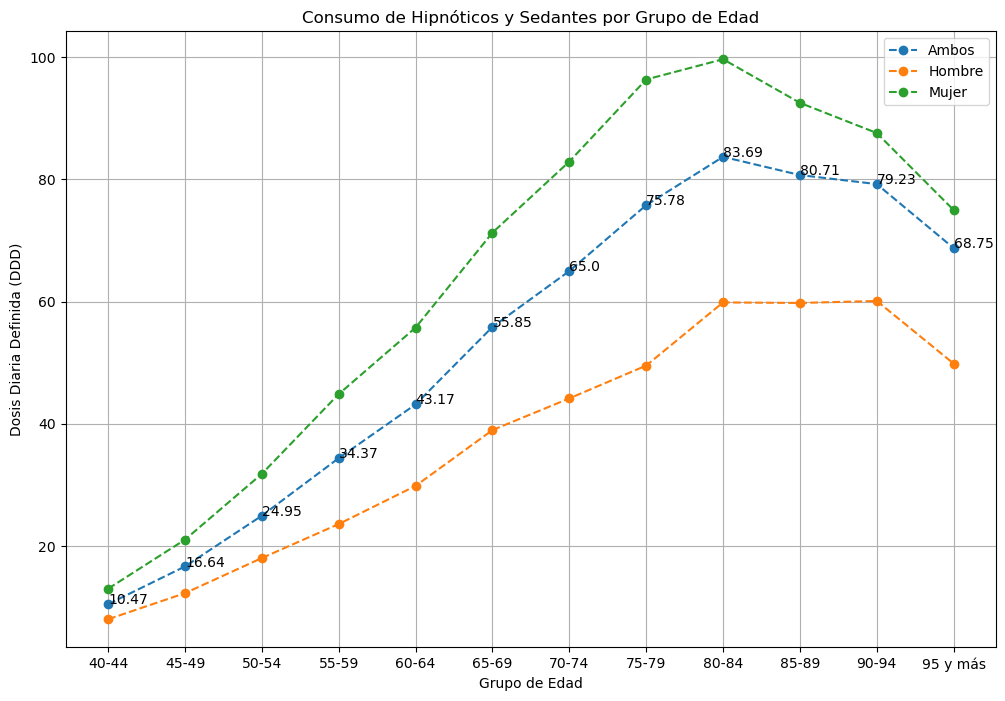

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    'Grupo edad': ['40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95 y más'],
    'Ambos': [10.47, 16.64, 24.95, 34.37, 43.17, 55.85, 65, 75.78, 83.69, 80.71, 79.23, 68.75],
    'Hombre': [8, 12.27, 18.02, 23.58, 29.83, 38.96, 44.15, 49.52, 59.86, 59.77, 60.1, 49.85],
    'Mujer': [13, 21.03, 31.8, 44.86, 55.74, 71.28, 82.92, 96.35, 99.67, 92.53, 87.59, 74.98]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Graficar consumo de hipnóticos y sedantes por grupo de edad
plt.figure(figsize=(12, 8))
for column in df.columns[1:]:
    plt.plot(df['Grupo edad'], df[column], marker='o', linestyle='--', label=column)

plt.title('Consumo de Hipnóticos y Sedantes por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Dosis Diaria Definida (DDD)')
plt.legend()
plt.grid(True)

# Agregar anotaciones
for i, txt in enumerate(df['Ambos']):
    plt.annotate(txt, (df['Grupo edad'][i], df['Ambos'][i]))

plt.show()


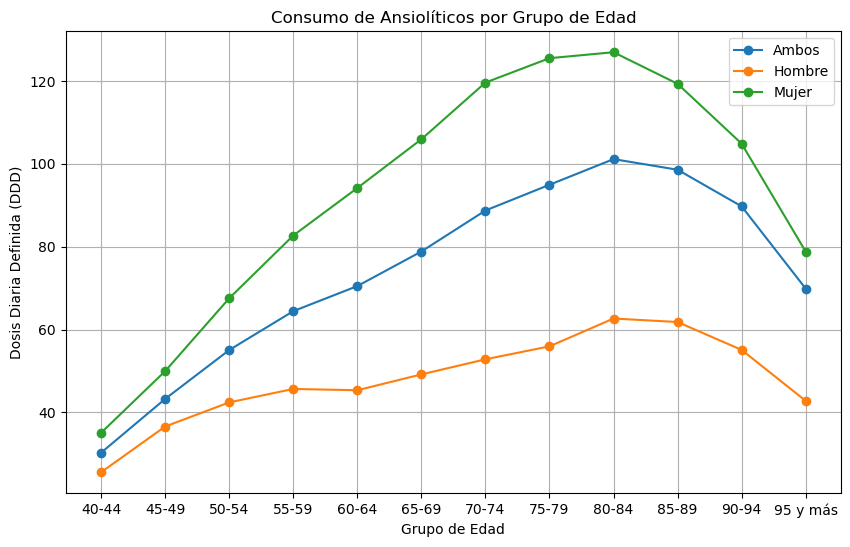

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    'Grupo edad': ['40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95 y más'],
    'Ambos': [30.3, 43.28, 55.07, 64.45, 70.5, 78.84, 88.73, 94.94, 101.13, 98.57, 89.73, 69.89],
    'Hombre': [25.59, 36.62, 42.44, 45.68, 45.37, 49.19, 52.83, 55.96, 62.67, 61.83, 55.1, 42.81],
    'Mujer': [35.11, 49.98, 67.56, 82.7, 94.16, 105.92, 119.6, 125.48, 126.92, 119.3, 104.86, 78.82]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Graficar consumo de ansiolíticos por grupo de edad
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:
    plt.plot(df['Grupo edad'], df[column], marker='o', label=column)

plt.title('Consumo de Ansiolíticos por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Dosis Diaria Definida (DDD)')
plt.legend()
plt.grid(True)
plt.show()

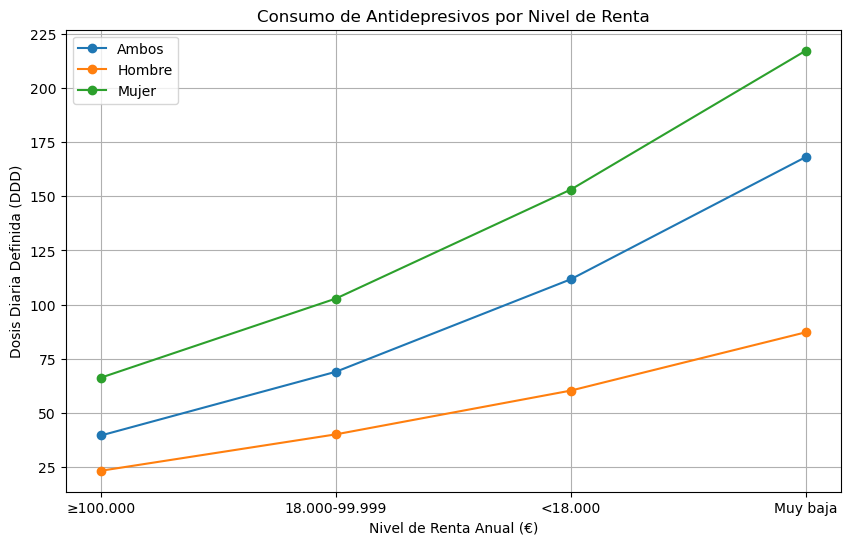

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    'Nivel de renta anual (€)': ['≥100.000', '18.000-99.999', '<18.000', 'Muy baja'],
    'Ambos': [39.6, 69.0, 111.7, 168.1],
    'Hombre': [23.3, 40.1, 60.3, 87.2],
    'Mujer': [66.3, 102.8, 153.1, 217.2]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Graficar consumo de antidepresivos por nivel de renta
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:
    plt.plot(df['Nivel de renta anual (€)'], df[column], marker='o', label=column)

plt.title('Consumo de Antidepresivos por Nivel de Renta')
plt.xlabel('Nivel de Renta Anual (€)')
plt.ylabel('Dosis Diaria Definida (DDD)')
plt.legend()
plt.grid(True)
plt.show()


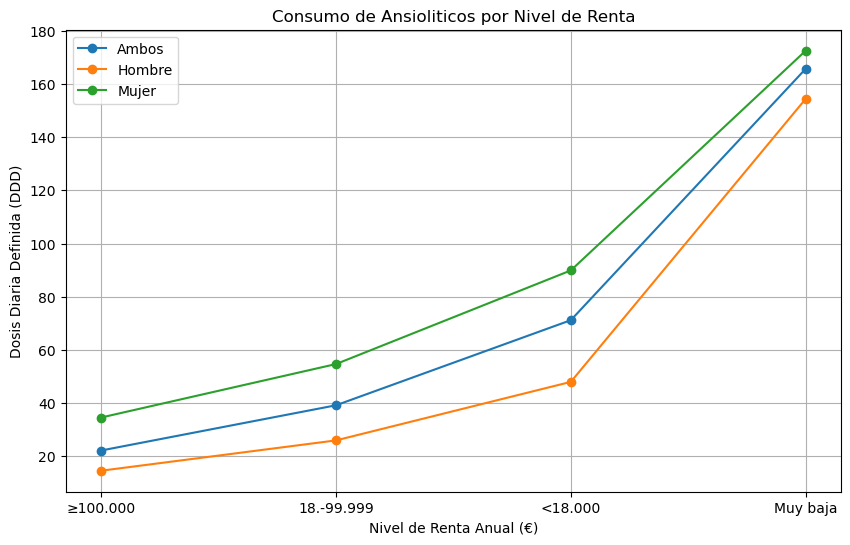

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
data = {
    'Nivel de renta anual (€)': ['≥100.000', '18.-99.999', '<18.000', 'Muy baja'],
    'Ambos': [22.2, 39.2, 71.2, 165.7],
    'Hombre': [14.6, 26.0, 48.0, 154.4],
    'Mujer': [34.6, 54.7, 89.9, 172.5]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Transformar el DataFrame para que sea más fácil de graficar
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:
    plt.plot(df['Nivel de renta anual (€)'], df[column], marker='o', label=column)

plt.title('Consumo de Ansioliticos por Nivel de Renta')
plt.xlabel('Nivel de Renta Anual (€)')
plt.ylabel('Dosis Diaria Definida (DDD)')
plt.legend()
plt.grid(True)
plt.show()


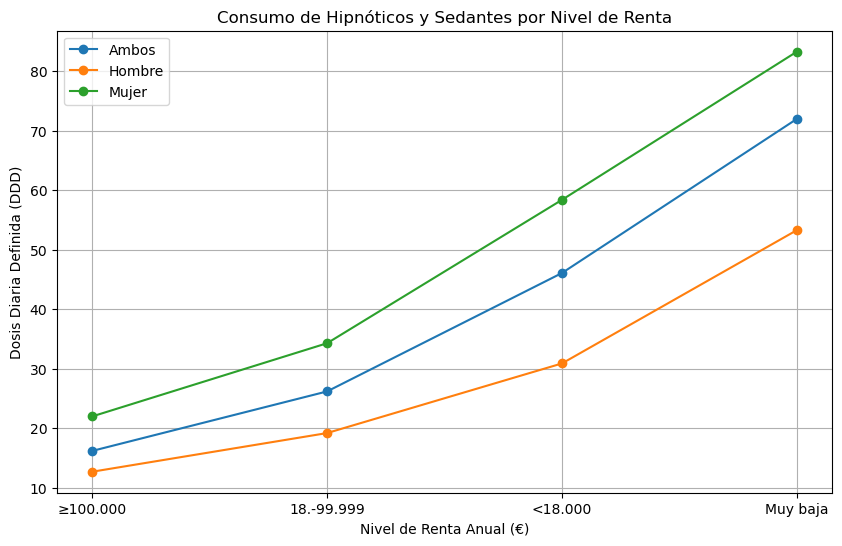

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
data = {
    'Nivel de renta anual (€)': ['≥100.000', '18.-99.999', '<18.000', 'Muy baja'],
    'Ambos': [16.2, 26.2, 46.1, 72.0],
    'Hombre': [12.7, 19.2, 30.9, 53.3],
    'Mujer': [22.0, 34.3, 58.4, 83.3]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Transformar el DataFrame para que sea más fácil de graficar
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:
    plt.plot(df['Nivel de renta anual (€)'], df[column], marker='o', label=column)

plt.title('Consumo de Hipnóticos y Sedantes por Nivel de Renta')
plt.xlabel('Nivel de Renta Anual (€)')
plt.ylabel('Dosis Diaria Definida (DDD)')
plt.legend()
plt.grid(True)
plt.show()


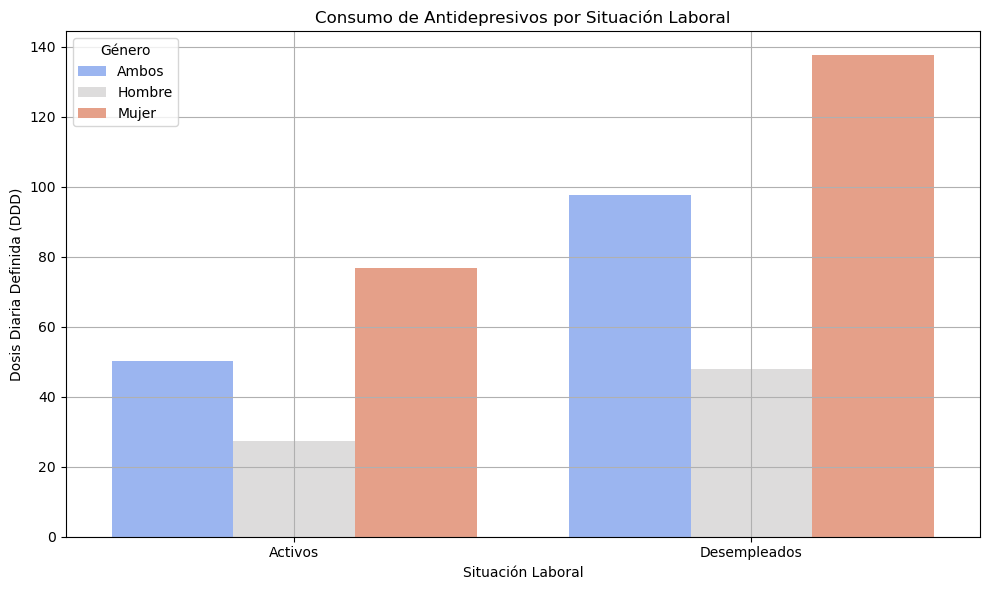

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
data = {
    'Situación laboral': ['Activos', 'Desempleados'],
    'Ambos': [50.2, 97.7],
    'Hombre': [27.4, 47.9],
    'Mujer': [76.8, 137.5]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Transformar el DataFrame para que sea más fácil de graficar
df_melted = df.melt(id_vars='Situación laboral', var_name='Género', value_name='DDD')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Situación laboral', y='DDD', hue='Género', data=df_melted, palette='coolwarm')

# Personalizar el gráfico
plt.title('Consumo de Antidepresivos por Situación Laboral')
plt.xlabel('Situación Laboral')
plt.ylabel('Dosis Diaria Definida (DDD)')
plt.legend(title='Género')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



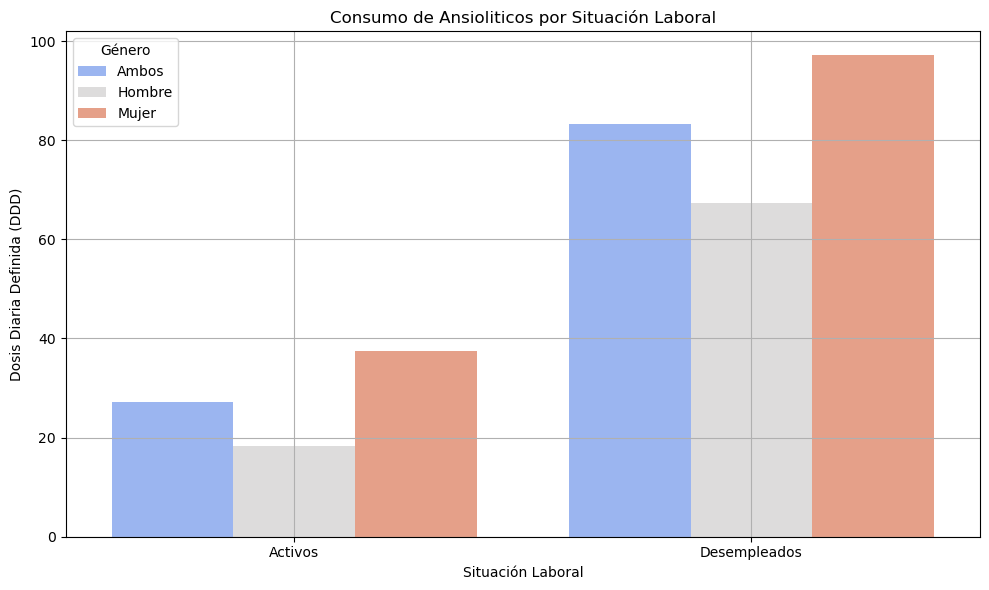

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
data = {
    'Situación laboral': ['Activos', 'Desempleados'],
    'Ambos': [27.2, 83.2],
    'Hombre': [18.4, 67.3],
    'Mujer': [37.5, 97.1]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Transformar el DataFrame para que sea más fácil de graficar
df_melted = df.melt(id_vars='Situación laboral', var_name='Género', value_name='DDD')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Situación laboral', y='DDD', hue='Género', data=df_melted, palette='coolwarm')

# Personalizar el gráfico
plt.title('Consumo de Ansioliticos por Situación Laboral')
plt.xlabel('Situación Laboral')
plt.ylabel('Dosis Diaria Definida (DDD)')
plt.legend(title='Género')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

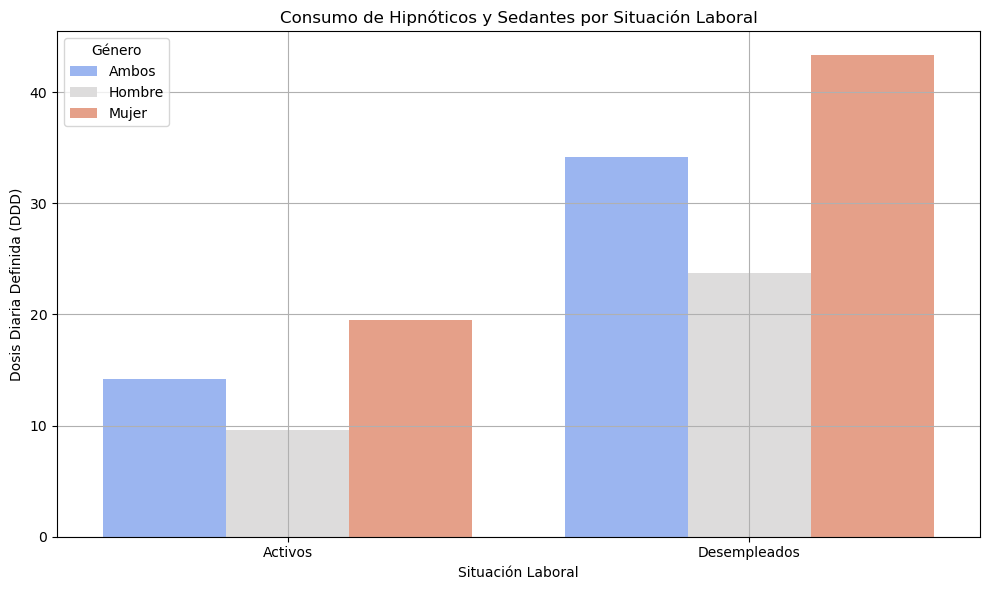

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
data = {
    'Situación laboral': ['Activos', 'Desempleados'],
    'Ambos': [14.2, 34.2],
    'Hombre': [9.6, 23.7],
    'Mujer': [19.5, 43.3]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Transformar el DataFrame para que sea más fácil de graficar
df_melted = df.melt(id_vars='Situación laboral', var_name='Género', value_name='DDD')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Situación laboral', y='DDD', hue='Género', data=df_melted, palette='coolwarm')

# Personalizar el gráfico
plt.title('Consumo de Hipnóticos y Sedantes por Situación Laboral')
plt.xlabel('Situación Laboral')
plt.ylabel('Dosis Diaria Definida (DDD)')
plt.legend(title='Género')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()